In [1]:
library(tidyverse)
library(emdbook)
library(ramify)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ramify’


The following object is masked from ‘package:purrr’:

    flatten


The following object is masked from ‘package:tidyr’:

    fill


The following object is masked from ‘package:graphics’:

    clip



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Exercise 1
• the number of claims received by an insurance company during a week follows a Poisson distri-
bution with unknown mean (μ)
• the number of claims, per week, observed ovr a ten week period are:


5, 8, 4, 6, 11, 6, 6, 5, 6, 4

(a) suppose to use a prior uniform distribution for μ
- find the posterior distribution for μ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval

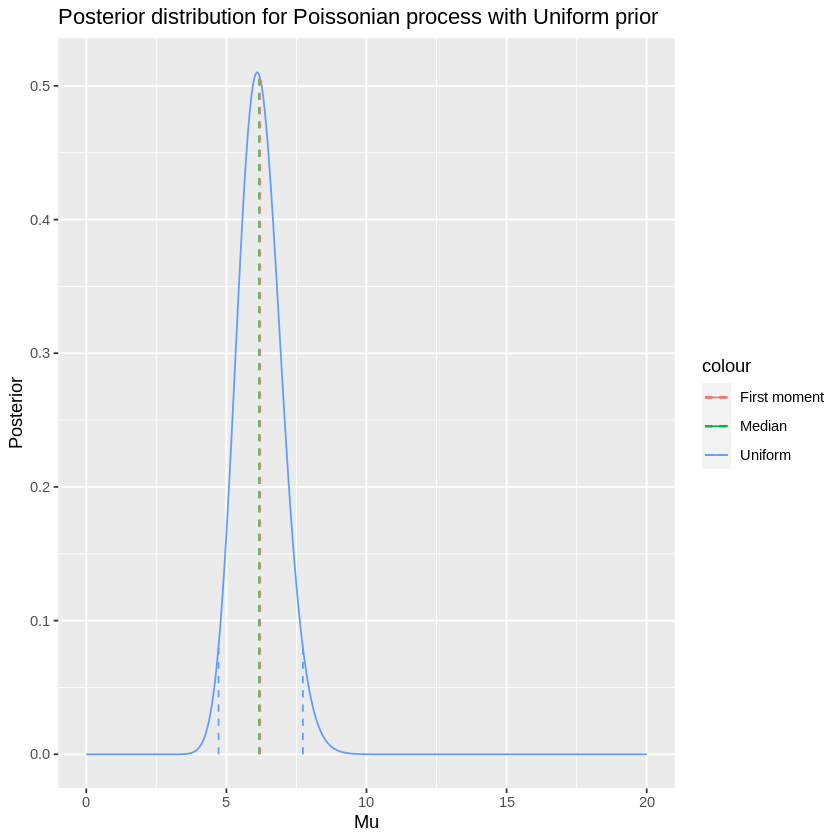

In [2]:
mu = seq(0,20, by= 0.01)
y = c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
#Priors
pU=1

#likelihood
lhP = function(mu, y){g <-exp(-mu) * mu^y /factorial(y)}

#posterior for single event
post = function(mu, y){g <- lhP(mu, y)*pU}

post_n = function(mu, y){
    p=1
    for (x in y){
        p = p* post(mu, x)
    }
    return(p)
}
postU = post_n(mu, y)/sum(post_n(mu, y)*0.01)

xU = ncredint(pvec=mu, npost=postU,level=0.95,tol=0.01,verbose=FALSE)

moment1U = sum(postU*mu*0.01 )
moment2U = sum(postU*0.01*(mu - moment1U)^2 )

for (i in seq(1, length(mu))){
    int  = sum(postU[1:i]*0.01)
    if (int>0.4999){medianU=mu[i]
                    break}
}


yUl = post_n(xU[['lower']], y)/sum(post_n(mu, y)*0.01)
yUu = post_n(xU[['upper']], y)/sum(post_n(mu, y)*0.01)
medU = post_n(medianU, y)/sum(post_n(mu, y)*0.01)
momU = post_n(moment1U, y)/sum(post_n(mu, y)*0.01)

ggplot() + geom_line(aes(x=mu, y=postU, color='Uniform'))+
    geom_segment(aes(x = xU[['lower']] , y = 0, xend = xU[['lower']], yend = yUl, color='Uniform'),linetype='dashed')+
    geom_segment(aes(x = medianU , y = 0, xend = medianU, yend = medU, color='Median'),linetype='dashed')+
    geom_segment(aes(x = moment1U , y = 0, xend = moment1U, yend = momU, color='First moment'),linetype='dashed')+
    geom_segment(aes(x = xU[['upper']] , y = 0, xend = xU[['upper']], yend = yUu, color='Uniform'),linetype='dashed')+
    labs(title='Posterior distribution for Poissonian process with Uniform prior', x='Mu', y='Posterior')

(b) suppose to use a Jeffreys’ prior for μ (g(μ) ∝ 1/sqrtμ)
- find the posterior distribution for μ and compute the posterior mean, median and variance
- plot the posterior distribution and the 95% credibility interval

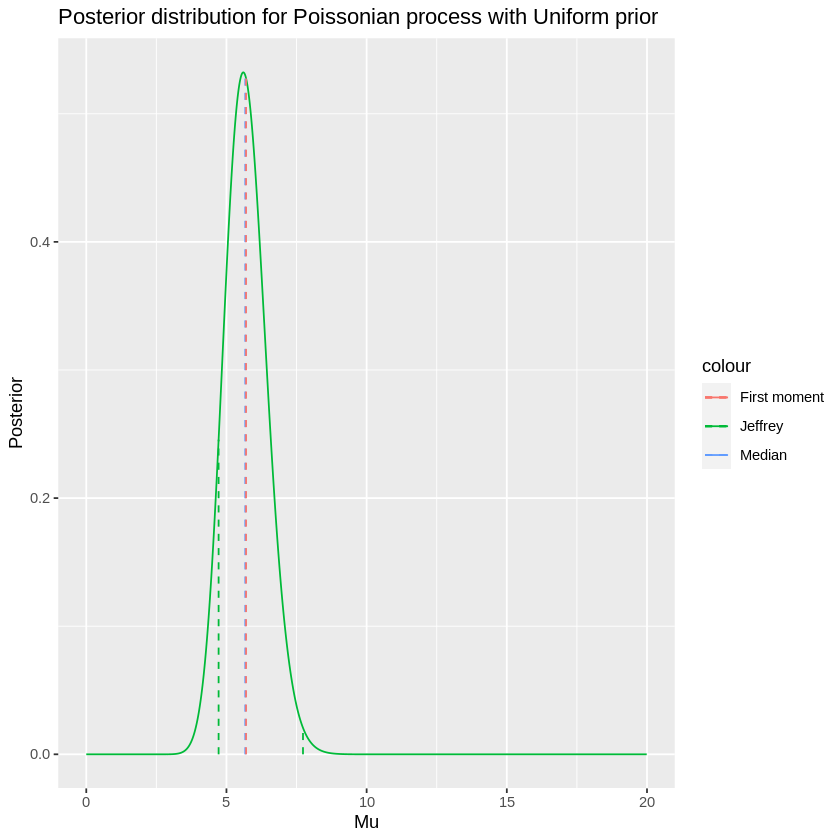

In [3]:
mu = seq(0.0001,20, by= 0.01)
y = c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
#Priors
pJ= function(mu){g<-1/sqrt(mu)}

#likelihood
lhP = function(mu, y){g <-exp(-mu) * mu^y /factorial(y)}

#posterior for single event
post = function(mu, y){g <- lhP(mu, y)*pJ(mu)}

post_n = function(mu, y){
    p=1
    for (x in y){
        p = p* post(mu, x)
    }
    return(p)
}
postJ = post_n(mu, y)/sum(post_n(mu, y)*0.01)

for (i in seq(1, length(mu))){
    int  = sum(postJ[1:i]*0.01)
    if (int>0.4999){medianJ=mu[i]
                    break}
}

xJ = ncredint(pvec=mu, npost=postU,level=0.95,tol=0.01,verbose=FALSE)


moment1J = sum(postJ*mu*0.01 )
moment2J = sum(postJ*0.01*(mu - moment1J)^2 )

yJl = post_n(xJ[['lower']], y)/sum(post_n(mu, y)*0.01)
yJu = post_n(xJ[['upper']], y)/sum(post_n(mu, y)*0.01)
medJ = post_n(medianJ, y)/sum(post_n(mu, y)*0.01)
momJ = post_n(moment1J, y)/sum(post_n(mu, y)*0.01)



ggplot() + geom_line(aes(x=mu, y=postJ, color='Jeffrey'))+
    geom_segment(aes(x = xJ[['lower']] , y = 0, xend = xJ[['lower']], yend = yJl, color='Jeffrey'),linetype='dashed')+
    geom_segment(aes(x = medianJ , y = 0, xend = medianJ, yend = medJ, color='Median'),linetype='dashed')+
    geom_segment(aes(x = moment1J , y = 0, xend = moment1J, yend = momJ, color='First moment'),linetype='dashed')+
    geom_segment(aes(x = xJ[['upper']] , y = 0, xend = xJ[['upper']], yend = yJu, color='Jeffrey'),linetype='dashed')+
    labs(title='Posterior distribution for Poissonian process with Uniform prior', x='Mu', y='Posterior')

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same
mean and standard deviation

In [4]:
#normalisation terms

cat('The first and second moment using a uniform prior is: \t', moment1U, ' , ', moment2U, '\n')
cat('The first and second moment using a jeffrey prior is: \t', moment1J, ' , ', moment2J, '\n')

xnU = ncredint(pvec=mu, npost=dnorm(mu, mean=moment1U, sd=sqrt(moment2U)),level=0.95,tol=0.01,verbose=FALSE)
xnJ = ncredint(pvec=mu, npost=dnorm(mu, mean=moment1J, sd=sqrt(moment2J)),level=0.95,tol=0.01,verbose=FALSE)


uniform = c(medianU, moment1U, moment2U, xU[['lower']], xU[['upper']])
jeffrey = c(medianJ, moment1J, moment2J, xJ[['lower']], xJ[['upper']])

gausU = c(moment1U, moment1U, moment2U, xnU[['lower']], xnU[['upper']])
gausJ = c(moment1J, moment1J, moment2J, xnJ[['lower']], xnJ[['upper']])


df = data.frame(Uniform = uniform, GausUniform=gausU, Jeffrey=jeffrey, GausJef=gausJ,
          row.names=c('Median','First moment', 'Second moment', 'Lower limit (95% credibility)', 'Upper limit (95% credibility)'))
df

The first and second moment using a uniform prior is: 	 6.2  ,  0.62 
The first and second moment using a jeffrey prior is: 	 5.7  ,  0.57 


Uniform GausUniform Jeffrey GausJef
Median                        6.17    6.2000      5.6701  5.7000 
First moment                  6.20    6.2000      5.7000  5.7000 
Second moment                 0.62    0.6200      0.5700  0.5700 
Lower limit (95% credibility) 4.72    4.6901      4.7201  4.2301 
Upper limit (95% credibility) 7.73    7.7101      7.7301  7.1701

# Exercise 2

• a well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease.


• A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of n = 75 patients known to have the disease is screened using the new
method.

(a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ?

ANSWER: It is a Bernullian distribution

(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method ?

In [5]:
p_freq = 6/75
cat('Frequentist estimation', 6/75)

Frequentist estimation 0.08

(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance

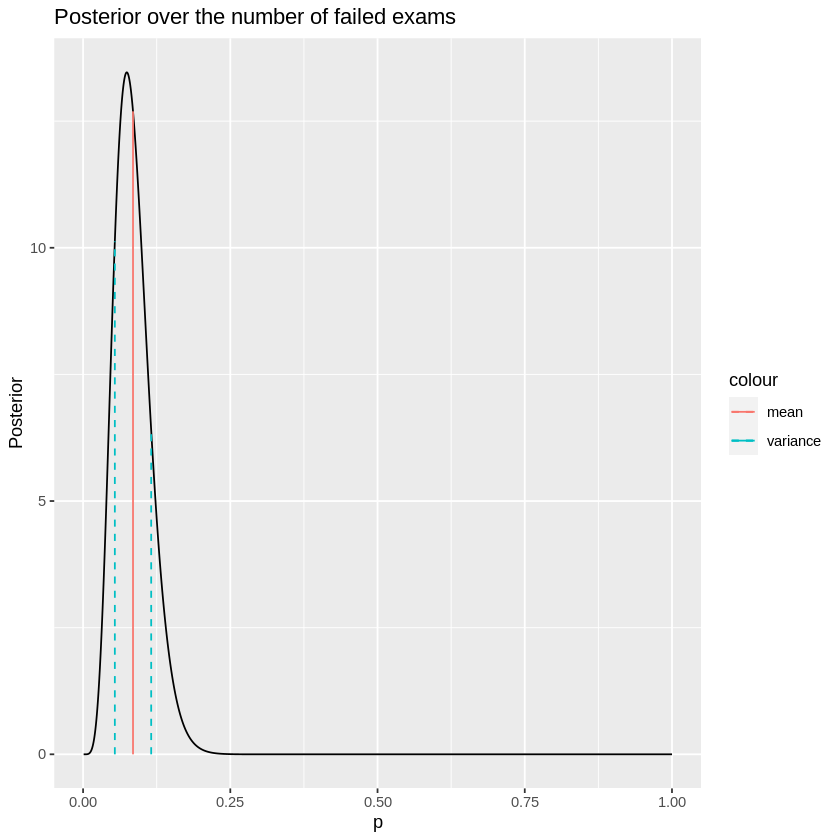

In [6]:
n_succ = 6
n_trial = 75
n_fail= seq(0,75, by= 1)

mean <- 0.15
std <- 0.14
var <- std*std

alpha <- mean*((mean*(1-mean))/var-1)
beta <- (1-mean)*((mean*(1-mean)/var-1))

priorB = function(p){g<-dbeta(p, alpha, beta)
                     return (g)}

#likelihood
lhB = function(p){g <-dbinom(6, n_trial, p)
                 return (g)}

Z= integrate(function(x){lhB(x)*priorB(x)}, lower=0, upper=1)$value

#posterior
postC = function(p){i <- lhB(p)*priorB(p)/Z
                   return (i)}

p <-  seq(0.001, 1, by=0.0001)
pC = postC(p)

moment1C = sum(p*pC*0.0001)
moment2C = sum(((p-moment1C)^2 *pC*0.0001))

ggplot()+geom_line(aes(x=p, y=pC))+
geom_segment(aes(x=moment1C, y=0, xend=moment1C, yend=postC(moment1C),color='mean'))+
geom_segment(aes(x = moment1C-sqrt(moment2C) , y = 0, xend = moment1C-sqrt(moment2C), yend = postC((moment1C-sqrt(moment2C))), color='variance'),linetype='dashed')+
geom_segment(aes(x = moment1C+sqrt(moment2C) , y = 0, xend = moment1C+sqrt(moment2C), yend = postC((moment1C+sqrt(moment2C))), color='variance'),linetype='dashed')+
labs(x='p', y='Posterior', title='Posterior over the number of failed exams')


(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in
ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test
the sample at a 5% level of significance in the Bayesian way.

In [7]:
#Parameter of the hypothesis testing
p0 <- 0.15 #threshold of acceptance
alpha <- 0.05 #confidence parameter




#BAYESIAN APPROACH
int = sum(pC[p>0.15]*0.0001)
cat('Value of the posterior integral:', int, ', is smaller than alpha, than we conclude the new method is better than the old one')

Value of the posterior integral: 0.03119761 , is smaller than alpha, than we conclude the new method is better than the old one

(e) Perform the same hypothesis test in the classical frequentist way

In [8]:
#FREQUENTIST APPROACH
#H0: the probability to fail the test is less or
#equal than 0.15


P0 = 0.15
alpha = 0.05

p6 = pbinom(6, size=75, prob=0.15)

cat('P-value:', p6, '\n')
cat('p-value<alpha:',p6<alpha, '. We accept the null hypotesis, the new test is no better than the old one')

P-value: 0.0543533 
p-value<alpha: FALSE . We accept the null hypotesis, the new test is no better than the old one

# Exercise 3

• given the problem of the lightouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown

In [9]:
# for each observation
func = function(obs){
    set.seed(12345)

    # true value of the lighthouse
    alpha_true <- -2
    beta_true <- 3

    # positions of the light sightings
    x <- function(alpha = alpha_true, beta = beta_true, n) {
        angle <- runif(n, min = -pi/2, max = pi/2)
        return(alpha + beta * tan(angle))
    }

    # total number of observations to base the analysis
    tot_obs = c(1, 3, 5, 10, 50, 100, 150, 175)

    # compute the sightings positions
    light_obervations <- x(n = max(tot_obs))

    # log posterior
    posterior <- function(a, b, x_pos) {
        logL <- 0
        for (x in x_pos) {
            logL <- logL + log(b/(pi * (b^2 + (x - a)^2)))
        }
        return(logL)
    }

    # integration variables
    n_points <- 200

    x_min <- -5
    x_max <- 5

    y_min <- 0
    y_max <- 5

    dx <- (x_max - x_min)/n_points
    dy <- (y_max - y_min)/n_points
    dxy <- (x_max - x_min) * (y_max - y_min)/(n_points^2)

    alpha <- seq(from = x_min, by = dx, length.out = n_points)
    beta <- seq(from = y_min, by = dy, length.out = n_points)

    # palette and graphic stuff
    cols <- rev(hcl.colors(10, "Reds"))
    par(mfrow = c(4, 2), cex.main = 2, cex.axis = 1.5)
    options(repr.plot.width = 16, repr.plot.height = 32)
    log_post <- matrix(data = NA, nrow = n_points, ncol = n_points)  # create an empty matrix

    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    df = expand_grid(alpha, beta)
    log_post = c()
    for (i in 1:length(pull(df['alpha']))){log_post = c(log_post, posterior(pull(df['alpha'])[i], pull(df['beta'])[i], light_obervations[1:obs]))}
    log_post=log_post-max(log_post)
    df = df |> add_column(post = exp(log_post)/(dxy * sum(exp(log_post))))
    
    ggplot(df, aes(x = alpha, y=beta, z=post))+geom_contour()+labs(x='Alpha', y='Beta', title=paste0('Number of samples: ', obs))+xlim(x_min, x_max)+ylim(y_min, y_max)+
    geom_vline(xintercept = alpha_true, linetype='dashed')+geom_hline(yintercept = beta_true, linetype='dashed')
}

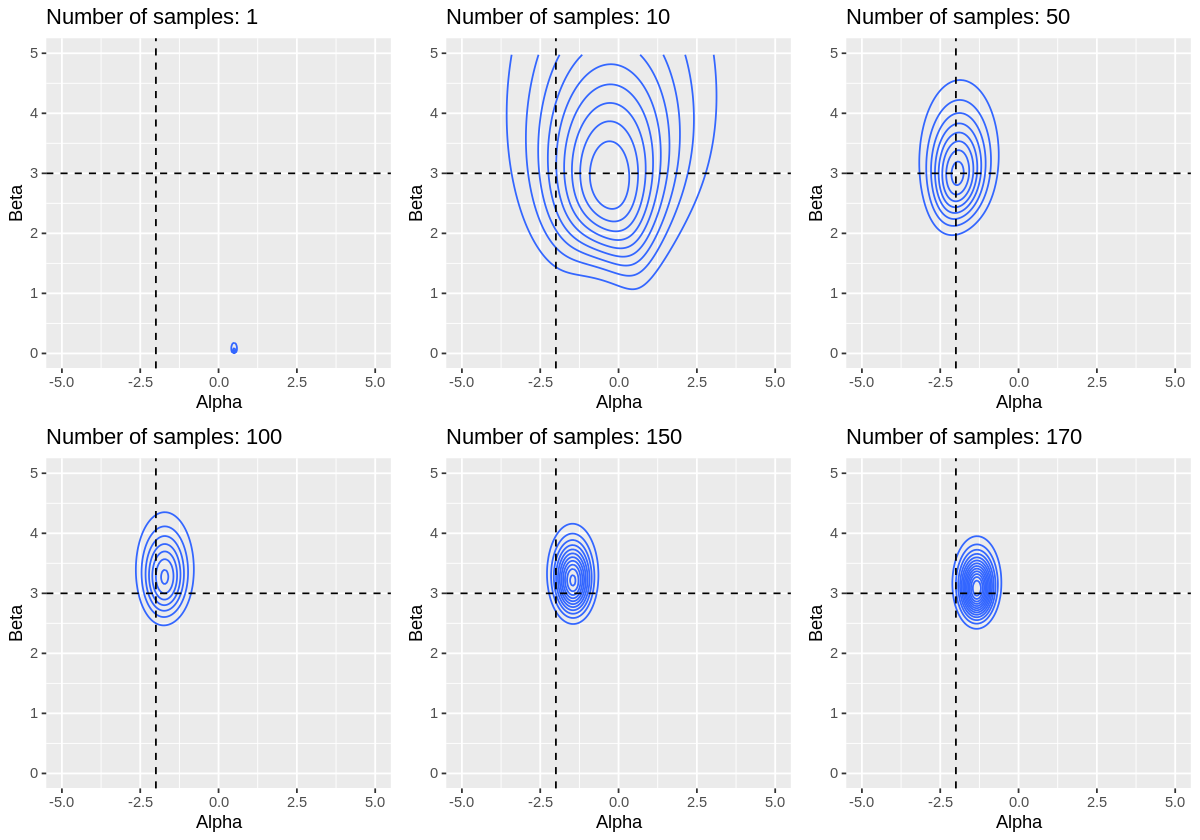

In [10]:
i_ls <-c(1, 10, 50, 100, 150, 170)
options(repr.plot.width = 10, repr.plot.height =3)
plots = lapply(i_ls, function(.i_ls){func(.i_ls)})
options(repr.plot.width = 10, repr.plot.height=7)
do.call(grid.arrange, c(grobs=plots, nrow=2))

# Exercise 4

• given the Signal over Background example discussed last week, analyze and discuss the following
cases:

In [11]:
# - Generative model
signal <- function (x, a, b, x0, w, t) {
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}
# Define model parameters
x0 <- 0 # Signal peak
w <-1 # Signal width
A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time

In [12]:
func = function(x0, w, A.true, B.true, Delta.t){
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal (xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length (s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal (xplot , A.true , B.true , x0, w, Delta.t)
    xdat.off <- xdat -0.25
    
    
    alim <- c(0.0, 4.0)
    blim <- c(0.5, 1.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
    to=1-1/(2*Nsamp), by=1/Nsamp)
    delta_a <- diff(alim )/ Nsamp
    delta_b <- diff(blim )/ Nsamp
    a <- alim[1] + diff(alim )* uniGrid
    b <- blim[1] + diff(blim )* uniGrid

    # Log posterior
    log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b <0) {return(-Inf )} # the effect of the prior
    sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE ))
    }
    # Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
    df = expand_grid(a, b)
    z = c()
    for (i in 1:length(pull(df['a']))){z = c(z, log.post(ddat , xdat , pull(df['a'])[i], pull(df['b'])[i], x0, w, Delta.t))}
    z=z-max(z)
    df = df |> add_column(z = exp(z))

    z <- z - max(z) # set maximum to zero
    
    
    z.mat <- matrix(data=NA , nrow= length (a), ncol=length(b))
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z.mat[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
        }
    }
    z.mat <- z.mat - max(z) # set maximum to zero
    
    p_a_D <- apply(exp(z.mat), 1, sum)
    p_a_D <- p_a_D/( delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z.mat), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    # Compute normalized conditional posteriors , P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters . Vectorize (func , par)
    # makes a vectorized function out of func in the parameter par.
    p_a_bD <- exp( Vectorize (log.post , "a")(ddat , xdat , a, B.true ,
    x0, w, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD))
    p_b_aD <- exp( Vectorize (log.post , "b")(ddat , xdat , A.true , b,
    x0, w, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD))
    
    # Plot unnormalized 2D posterior as contours .
    # options(repr.plot.width = 5, repr.plot.height =5)
    plot.b = ggplot()+
    geom_line(aes(x = b, y = p_b_D, color='P(B | D)'))+
    geom_line(aes(x=b, y = p_b_aD,color='P(B | A,D)'))+
    geom_vline(xintercept = B.true)+
    labs(x='Background, B', y='Posteriors', title='Marginalised Posteriors')+
    theme(legend.position = c(0.2, 0.8))


    plot.a = ggplot()+
    geom_line(aes(x = a, y = p_a_D, color='P(A | D)'))+
    geom_line(aes(x=a, y = p_a_bD,color='P(A | B,D)'))+
    geom_vline(xintercept = A.true)+
    theme(legend.position = c(0.2, 0.8))
    
    
    plot.cont = ggplot(df, aes(x = a, y=b, z=z))+geom_contour()+labs(x='A', y='B', title='Posterior')+xlim(0,4)+ylim(0.5,1.5)

    plot.sign = ggplot()+
    geom_line(aes(x=xplot, y=splot))+labs(x='x', y='Signal + Background counts', title=paste0('W = ',w, ', A/B = ',A.true/B.true))+
    geom_step(aes(x=xdat.off, y=ddat), color='red')+
    xlim(range(xplot)[1], range(xplot)[2])+
    ylim(range(c(splot , ddat ))[1], range(c(splot , ddat ))[2])
    # options(repr.plot.width = 10, repr.plot.height =2.5)
    arrangeGrob(grobs=list(plot.sign,plot.cont, plot.b, plot.a), nrow=1)
}

(a) vary the sampling resolution of used to generate the data, keeping the same sampling range
xdat <- seq(from=-7*w, to=7*w, by=0.5*w)


• change the resolution w = {0.1, 0.25, 1, 2, 3}

• Check the effect on the results

Warning message:
“Removed 5 rows containing missing values (`geom_step()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”


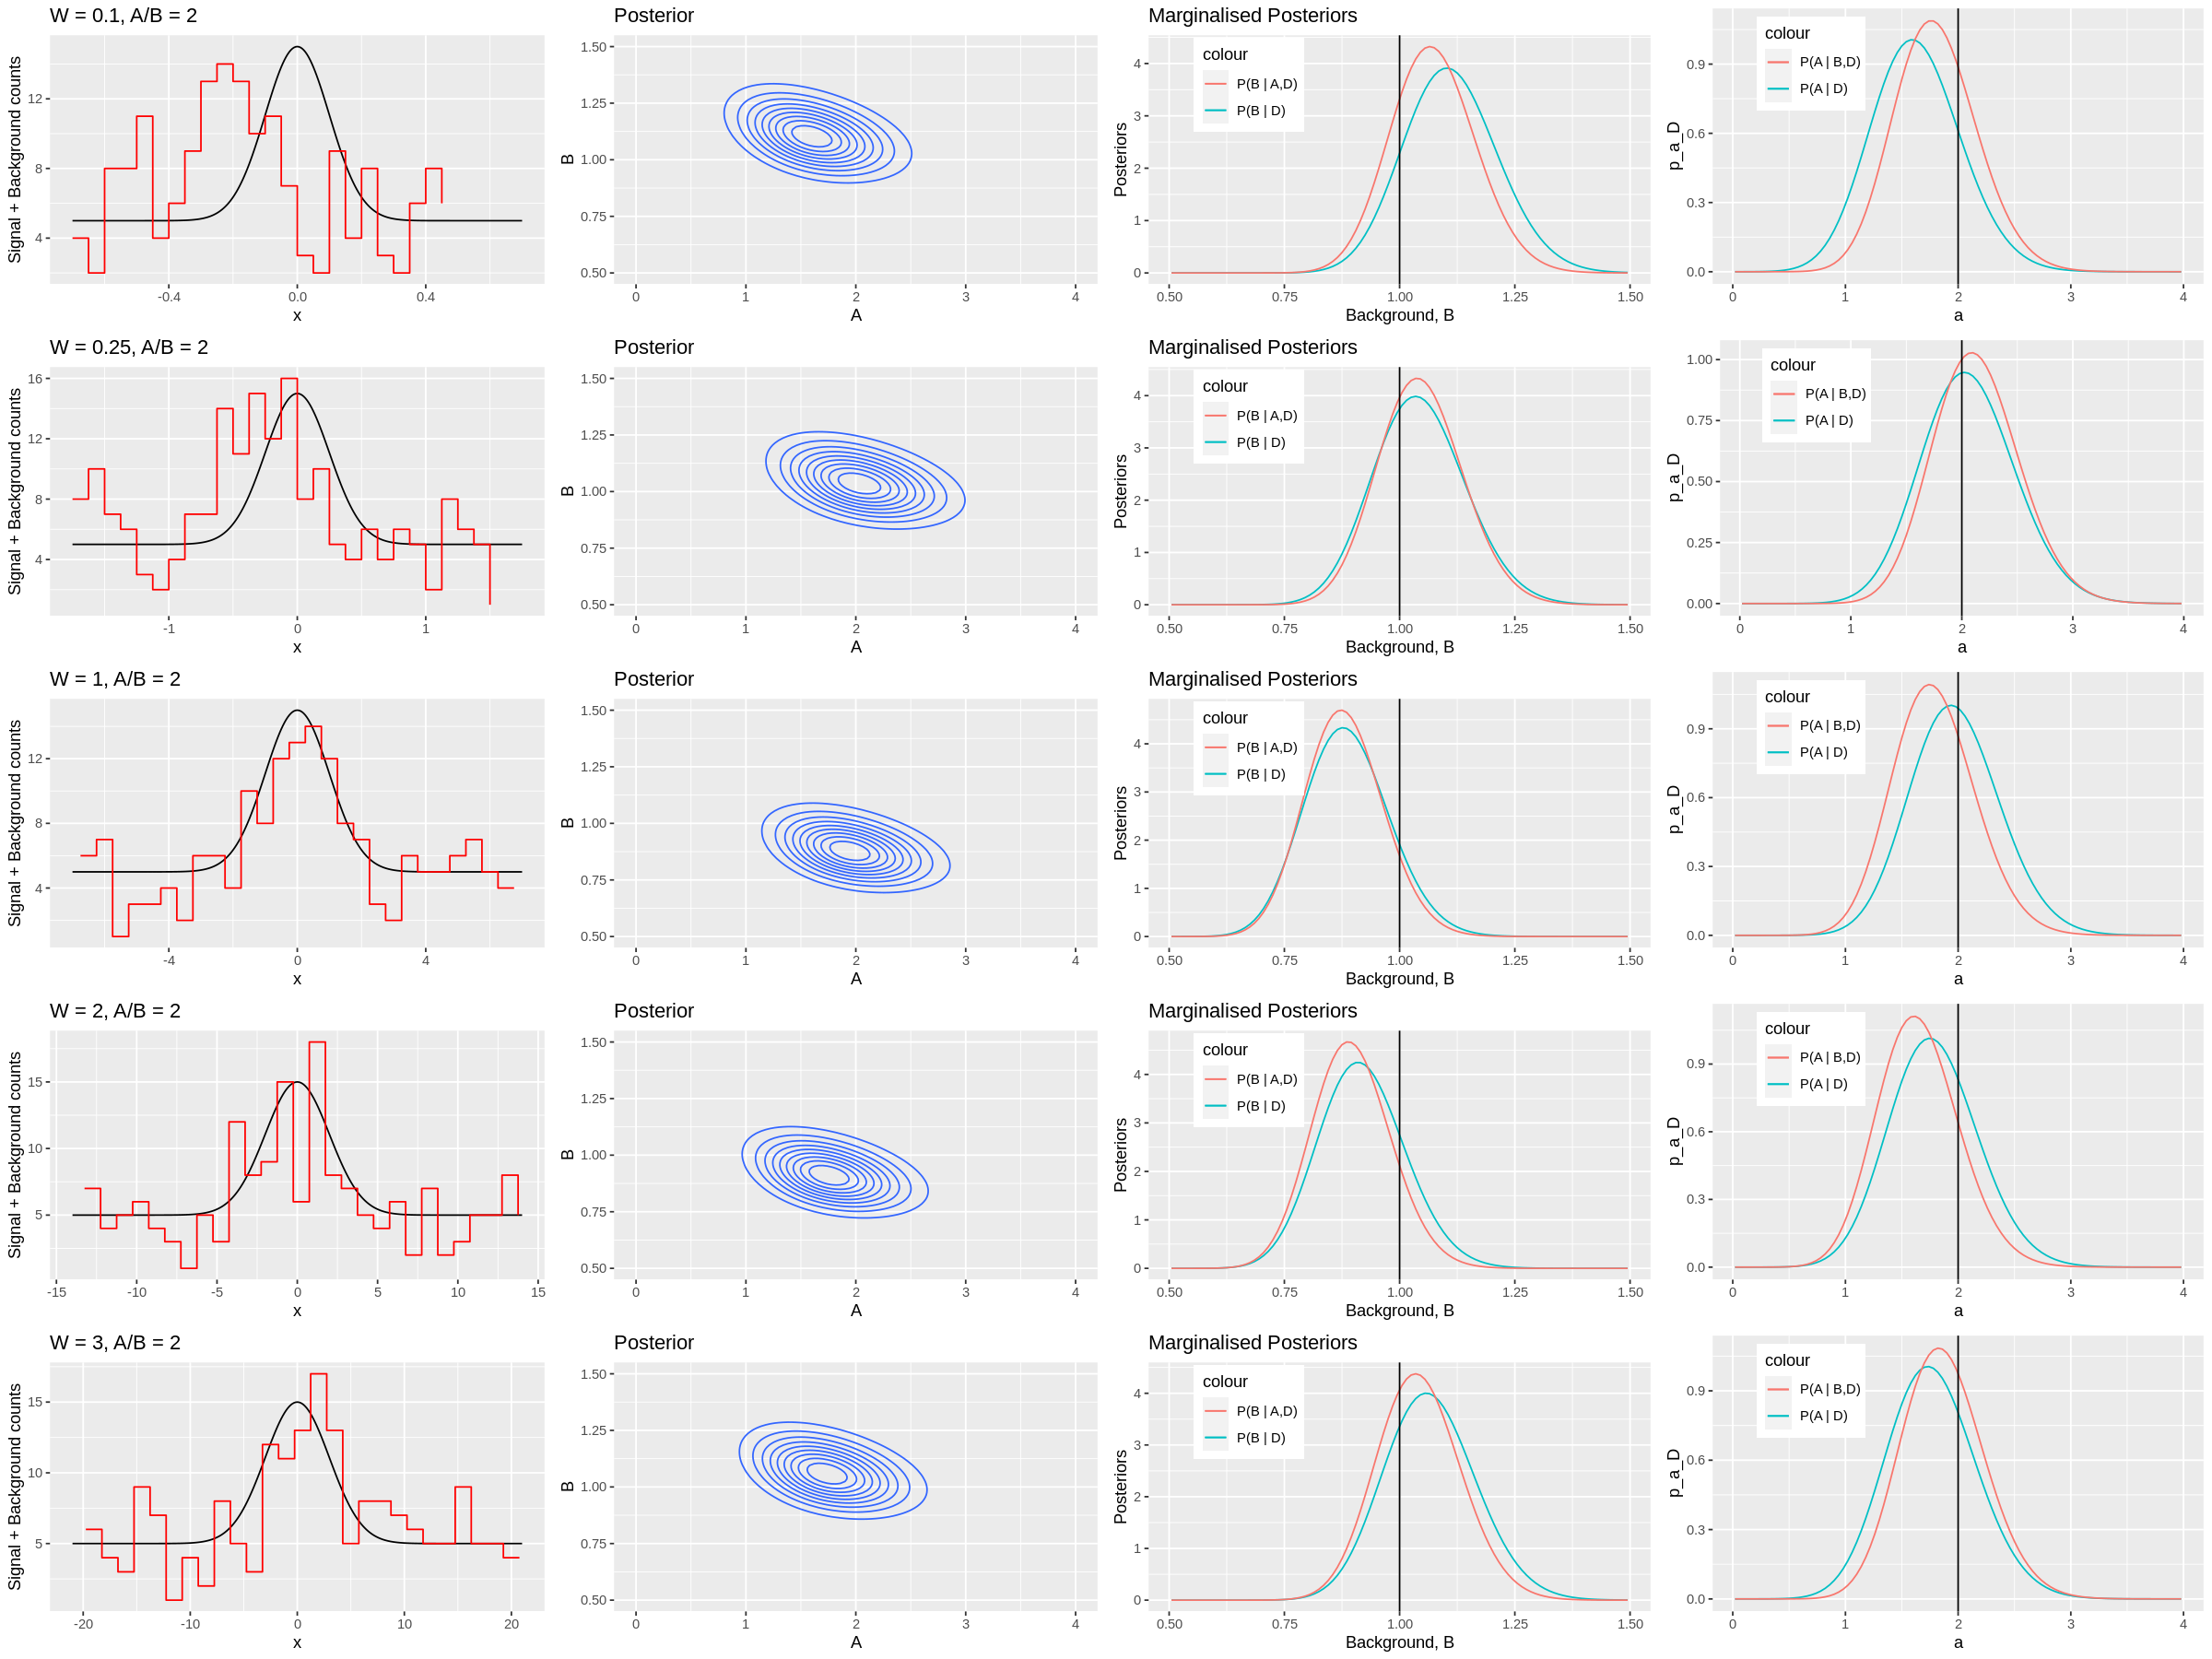

In [13]:
w_ls <-c(0.1, 0.25, 1, 2, 3)
set.seed(205)
plots = lapply(w_ls, function(.w_ls){func(x0, .w_ls, A.true, B.true, Delta.t)})
options(repr.plot.width = 20, repr.plot.height =15)
do.call(grid.arrange, c(grobs=plots, nrow=5))

(b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
• Check the effect on the results

Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”
Warning message:
“Removed 1 row containing missing values (`geom_step()`).”


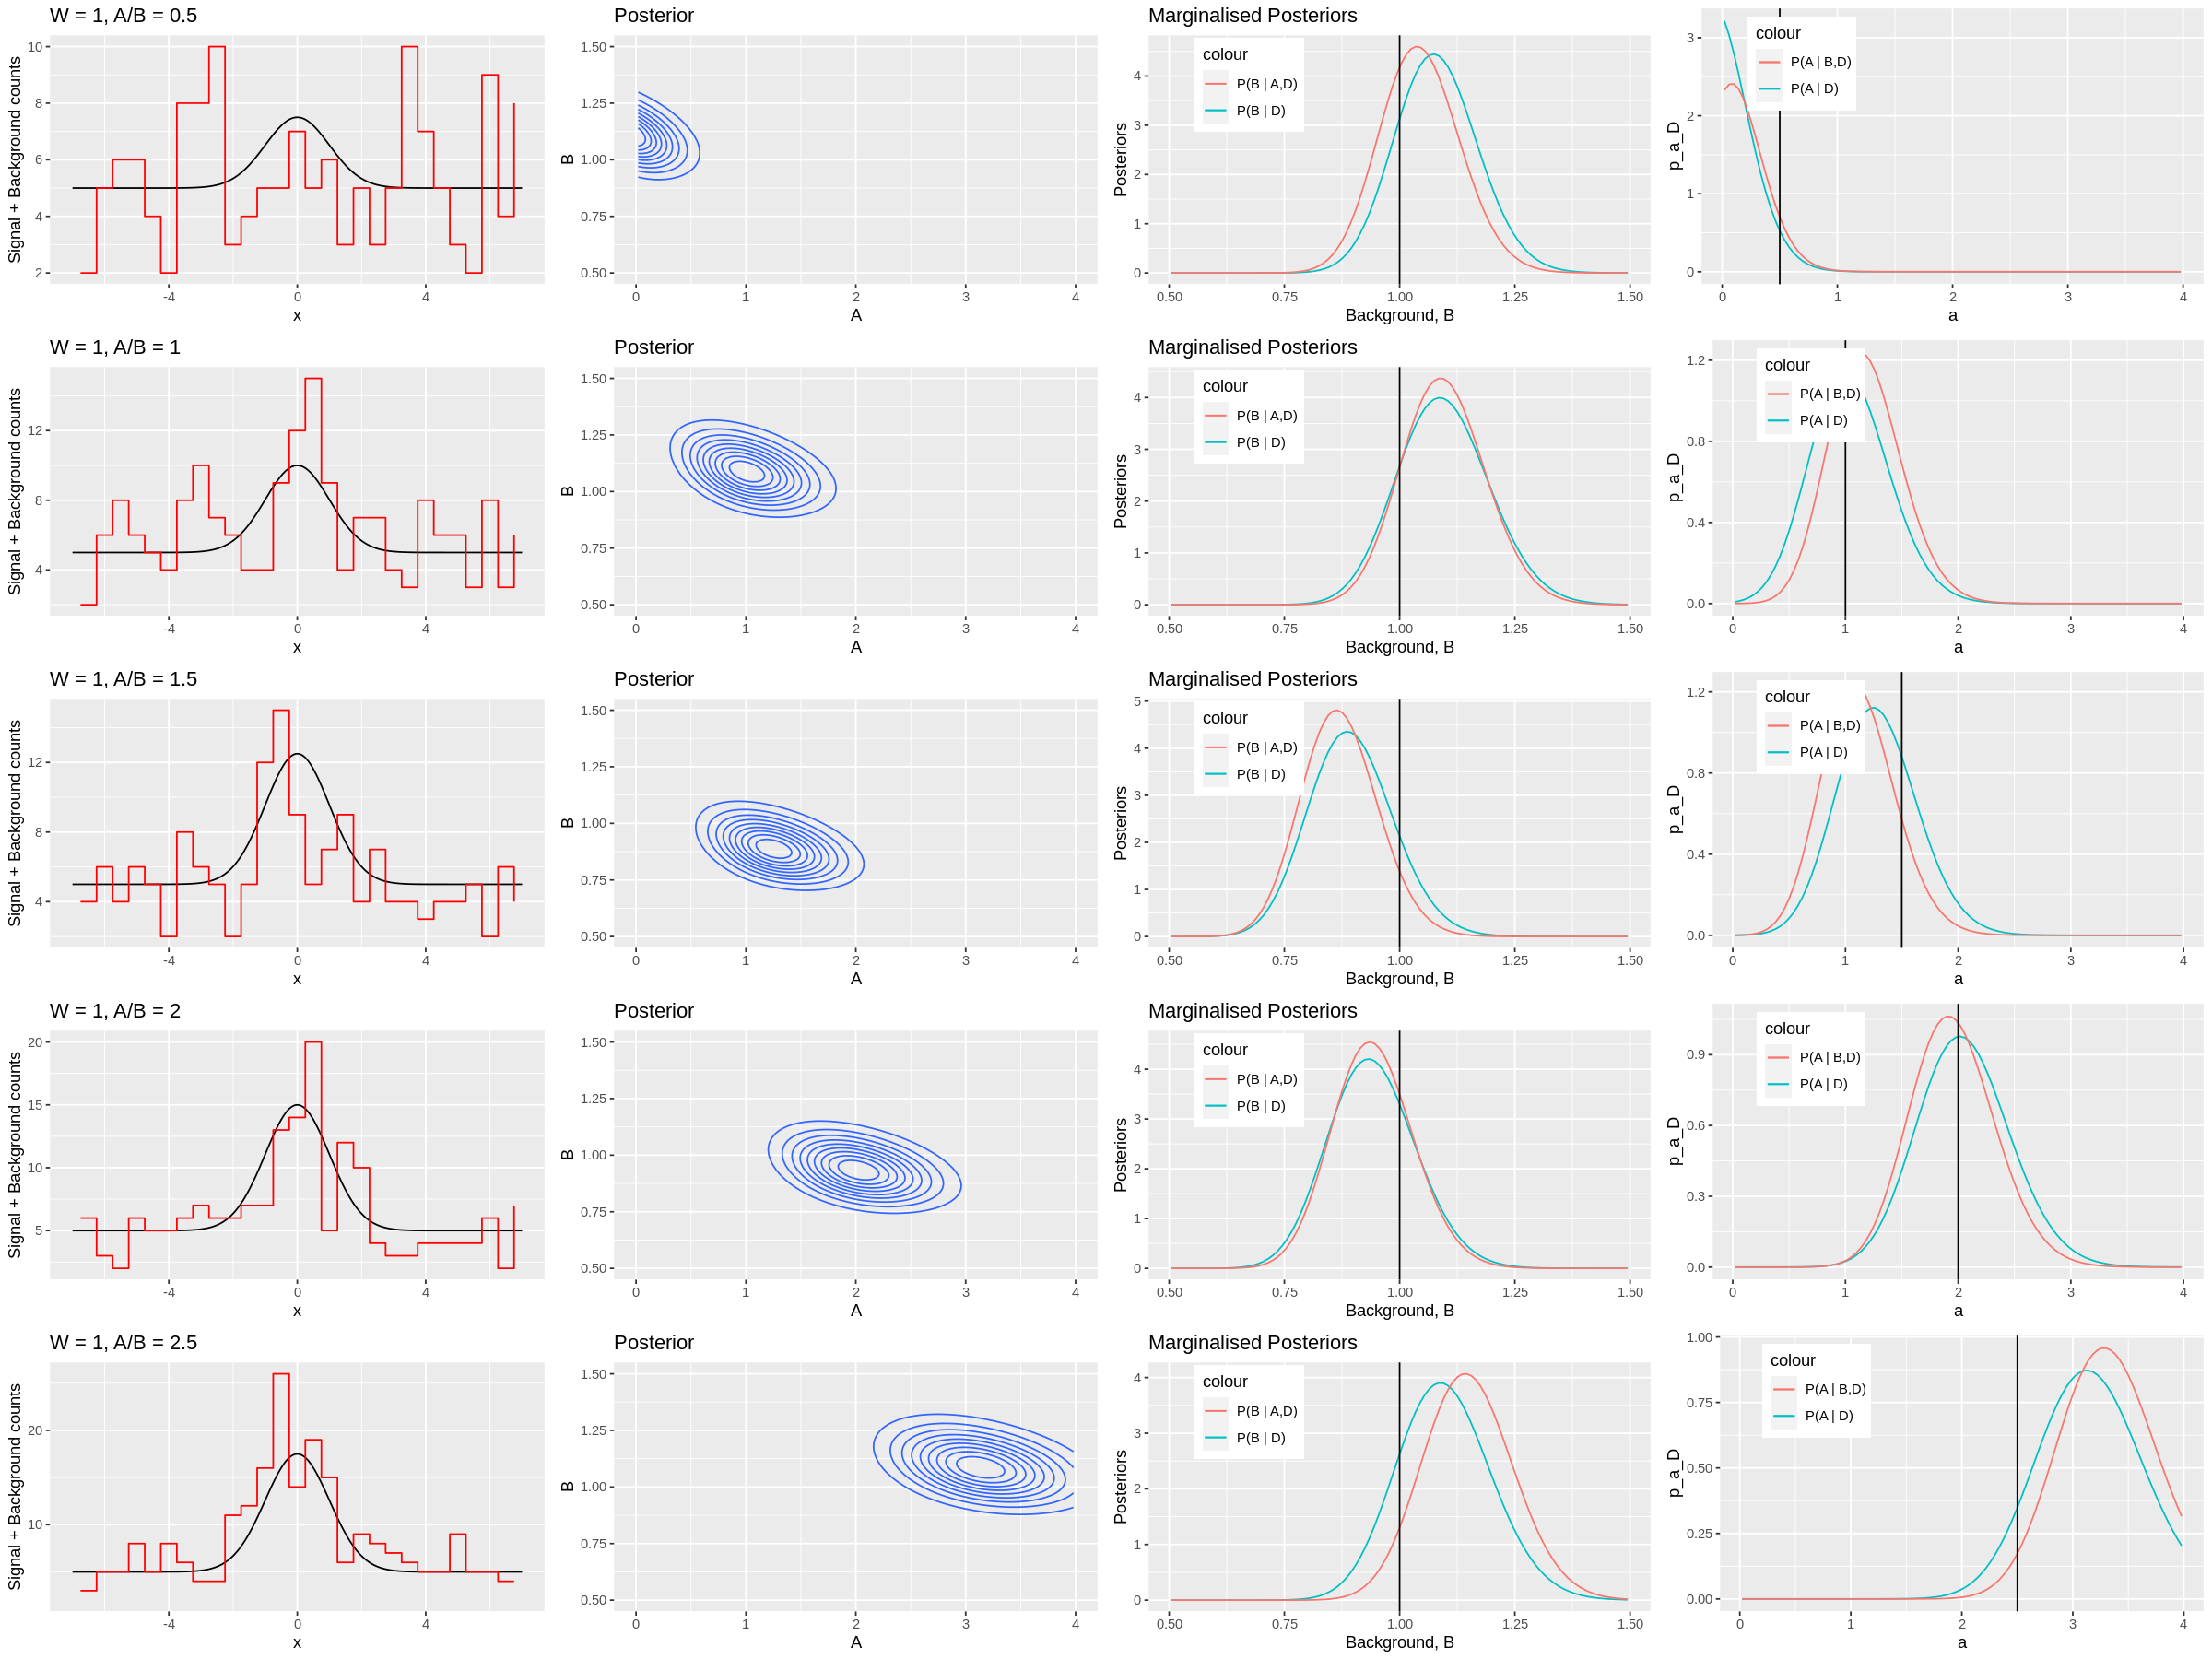

In [14]:
w = 1
A_ls = c(0.5, 1, 1.5, 2, 2.5)
set.seed(205)
plots = lapply(A_ls, function(.A_ls){func(x0, w, .A_ls, B.true, Delta.t)})
options(repr.plot.width = 20, repr.plot.height =15)
do.call(grid.arrange, c(grobs=plots, nrow=5))